In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ternary
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

In [2]:
df = pd.read_csv('test files\detected_results.csv')

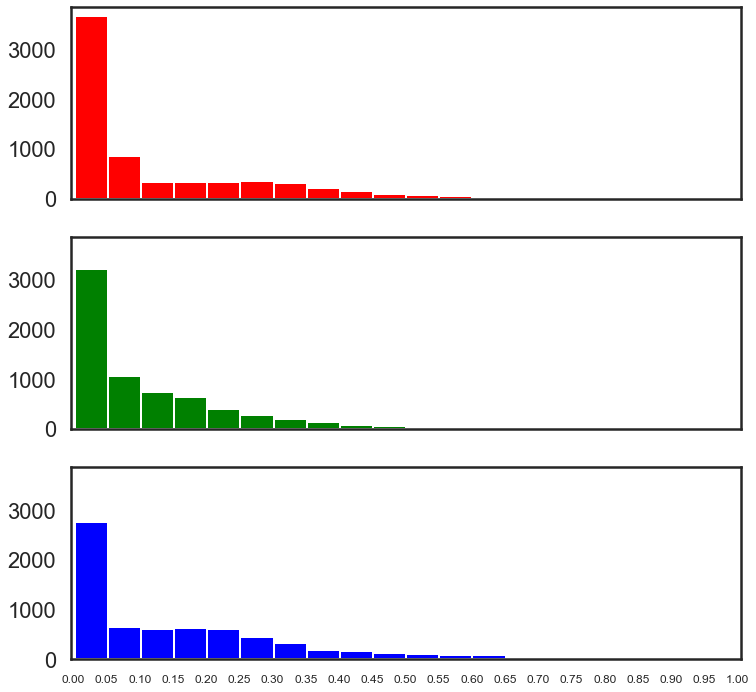

In [3]:
#return historgram of individual channel values

fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(12,12))
axs[0].hist(df['rel_red'],bins=20,color='red')
axs[1].hist(df['rel_green'],bins=20,color='green')
axs[2].hist(df['rel_blue'],bins=20,color='blue')
plt.xticks(np.arange(0, 1+0.05, step=0.05))
plt.tick_params(axis = 'x', labelsize=12)
plt.margins(x=0.005)

plt.show()

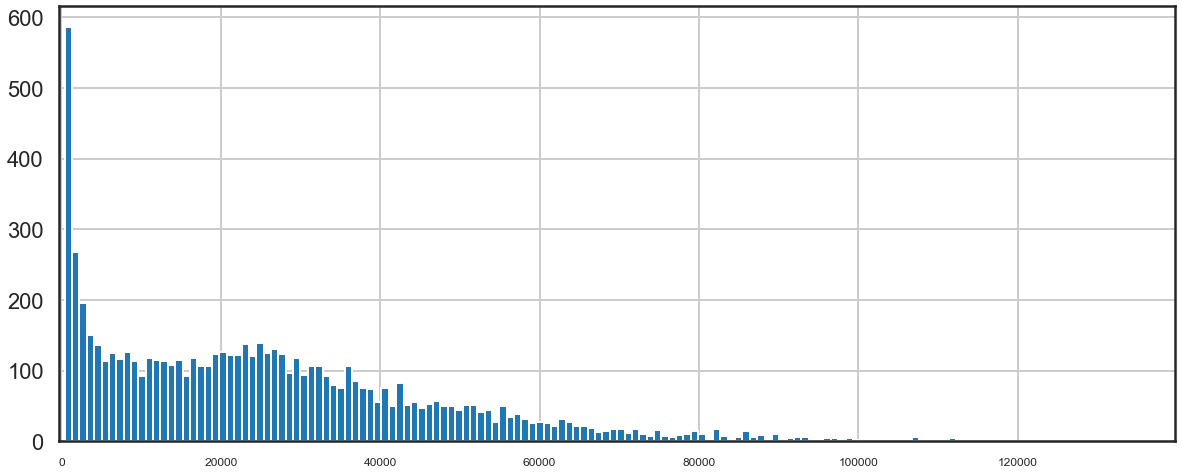

In [4]:
#return histogram total cell value
#see largest bin is lowest values
df['channel_sum'].hist(bins=150,figsize=(20,8))
plt.tick_params(axis = 'x', labelsize=12)
plt.margins(x=0.005)

plt.show()

In [5]:
#bin cell total values and return interval and frequency as dataframe
#could aggregate bin value or floor to threshold values

bins = pd.cut(df['channel_sum'],bins=150).value_counts().sort_index()
bins_df = pd.DataFrame(bins).reset_index()

def intervalSet(x):
    return (x.left,x.right)

interval_list = []

for i in bins_df['index']:
    interval_list.append(intervalSet(i))
    
bins_df = bins_df.drop(columns='index')

bins_df['interval'] = interval_list

In [6]:
#set minium value threshold and filter df
threshhold = 0.1
red = df['rel_red'] > threshhold
green = df['rel_green'] > threshhold
blue = df['rel_blue'] > threshhold
df2 = df[red | green | blue].reset_index()

#convert to np matrix
channel_data = df2[['ratio_red', 'ratio_green', 'ratio_green']].to_numpy()
#np.save('test files\cluster_data_input.npy',channel_data)

#return rgb values from df2 as series of hex color codes for viz
def hexColor(r,g,b):
    return '#%02x%02x%02x' % (int(r),int(g),int(b))

hex_color = df2[['rgb_red', 'rgb_green', 'rgb_blue']].apply(lambda x:hexColor(*x),axis=1)

100%|█████████████████████████████████████████████████████████████████████████████| 5044/5044 [00:06<00:00, 753.54it/s]


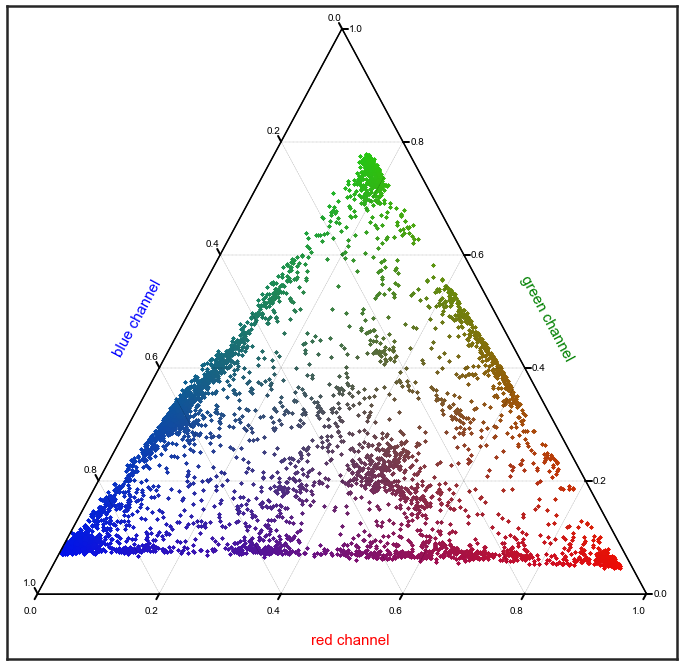

In [7]:
figure, tax = ternary.figure(scale=1)
figure.set_size_inches(12, 12)
tax.clear_matplotlib_ticks()

tax.boundary(linewidth=1.5)
tax.gridlines(color='black', multiple=0.2, linewidth=0.3)

tax.get_axes().axis('on')
tax.ticks(axis='lbr', linewidth=2, multiple=0.2,tick_formats='%.1f')
tax.boundary(linewidth=1)

tax.bottom_axis_label('red channel', offset=-0.05, fontsize=15, color='red')
tax.right_axis_label('green channel', offset=0.1, fontsize=15, color='green')
tax.left_axis_label('blue channel', offset=0.1, fontsize=15, color='blue')

for i in tqdm(range(channel_data.shape[0])):
    point = [tuple(channel_data[i,:])]
    color = hex_color[i]

    tax.scatter(point, marker='x', color=color, s=5)

ternary.plt.show()